Hidrologia <p>
#**Taller en Python - Modelos e indices de formas de cuencas hidrograficas**<p>
Python workshop - Basin shapes models and indices<p>
Pedro Rau, PhD - prau@utec.edu.pe

#a. Forma de una cuenca con un circulo equivalente (Gravelius, 1914)
---





Indice de Gravelius = 1.6999059481507026 es una cuenca alargada con baja susceptibilidad a las avenidas
Radio = 2.3398570856760226 Km


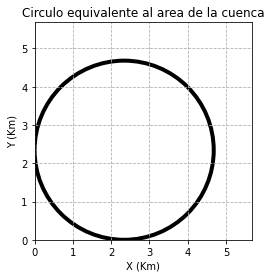

In [ ]:
# Indice de compacidad o Gravelius
import matplotlib.pyplot as plt
# ingresar las variables
A = 17.2  #área en Km2
p = 25  #perímetro en Km

# procesamiento
Kg = 0.282*p/A**0.5
r = (A/3.141592)**0.5
if Kg <= 1.25: print("Indice de Gravelius =",Kg,"es una cuenca casi redonda con alta susceptibilidad a las avenidas")
else:
  if Kg > 1.5:  print("Indice de Gravelius =",Kg,"es una cuenca alargada con baja susceptibilidad a las avenidas")
  else: print("Indice de Gravelius =",Kg,"es una cuenca oval-redonda con susceptibilidad moderada a las avenidas")
print("Radio =",r,"Km")
figure, axes = plt.subplots()
axes.set_aspect(1)
plt.xlim(0,2*r+1)
plt.ylim(0,2*r+1)
plt.grid(linestyle='--')
draw_circle = plt.Circle((r, r), r, fill=False, color="k", linewidth=4)
axes.add_artist(draw_circle)
plt.title('Circulo equivalente al area de la cuenca')
plt.xlabel("X (Km)")
plt.ylabel("Y (Km)")
plt.show()

#b. Forma de una cuenca con el rectangulo equivalente (Péguy, 1942; Serrat y Depraetere, 1997)
---

Indice de elongacion = 1.657477619568504 es una cuenca alargada con baja susceptibilidad a las avenidas
Lado mayor = 5.33934593902458 Km
Lado menor = 3.2213683466897054 Km


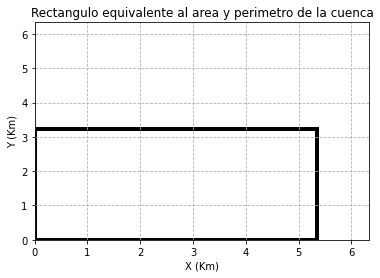

In [ ]:
# Indice de elongacion del rectangulo equivalente
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# ingresar las variables
A = 17.2  #área en Km2
p = 17  #perímetro en Km

# procesamiento
Kg = 0.282*p/A**0.5
lmax = (Kg/1.12)*np.sqrt(A)*(1+np.sqrt(1-(1.12/Kg)**2)) 
lmin = (Kg/1.12)*np.sqrt(A)*(1-np.sqrt(1-(1.12/Kg)**2))
Ia = lmax/lmin
if Ia <= 1.25: print("Indice de elongacion =",Ia,"es una cuenca casi redonda con alta susceptibilidad a las avenidas")
else:
  if Ia > 1.5:  print("Indice de elongacion =",Ia,"es una cuenca alargada con baja susceptibilidad a las avenidas")
  else: print("Indice de elongacion =",Ia,"es una cuenca oval-redonda con susceptibilidad moderada a las avenidas")
print("Lado mayor =",lmax,"Km")
print("Lado menor =",lmin,"Km")
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0,0), lmax, lmin,fc='None',color ='k', linewidth=4))
plt.grid(linestyle='--')
plt.ylim((0,lmax+1))
plt.xlim((0,lmax+1))
plt.title('Rectangulo equivalente al area y perimetro de la cuenca')
plt.xlabel("X (Km)")
plt.ylabel("Y (Km)")
plt.show()

#c. Forma de una cuenca a través de la lemniscata equivalente (Chorley et al, 1957)

---








Coeficiente de lemniscata = 1.7671455 es una cuenca oval-redonda con susceptibilidad moderada a las avenidas
Ancho max = 8.488265397501225 Km


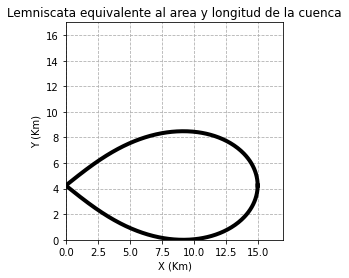

In [ ]:
# Factor de forma de lemniscata
import numpy as np
import matplotlib.pyplot as plt
# ingresar las variables
A = 100  #área en Km2
L = 15  #longitud de la cuenca en Km

# procesamiento
k = (L**2)*np.pi/(4*A)
alpha = L/np.sqrt(2)
beta = L/k
if k > 3: print("Coeficiente de lemniscata =",k,"es una cuenca fuertemente alargada con baja susceptibilidad a las avenidas")
else:
  if k > 1.5:  print("Coeficiente de lemniscata =",k,"es una cuenca oval-redonda con susceptibilidad moderada a las avenidas")
  else: print("Coeficiente de lemniscata =",k,"es una cuenca casi redonda con alta susceptibilidad a las avenidas")
print("Ancho max =",L/k,"Km")
t = np.linspace(0, 2*np.pi, num=1000)
x = alpha * np.sqrt(2) * np.cos(t) / (np.sin(t)**2 + 1)
y = beta * np.sqrt(2) * np.cos(t) * np.sin(t) / (np.sin(t)**2 + 1) + L/(2*k)
figure, axes = plt.subplots()
axes.set_aspect(aspect=1)
if k<1:
 plt.xlim(0,4*L)
 plt.ylim(0,4*L)
else:
 plt.xlim(0,L+2)
 plt.ylim(0,L+2)
plt.grid(linestyle='--')
plt.plot(x,y,color="k", linewidth=4)
plt.title('Lemniscata equivalente al area y longitud de la cuenca')
plt.xlabel("X (Km)")
plt.ylabel("Y (Km)")
plt.show()

#d. Forma de una cuenca a través de la elipse equivalente (Moussa, 2003)

---

Indice de forma = 0.1403170345565139 es una cuenca alargada con baja susceptibilidad a las avenidas
Area = 4525.0 m²
Eje mayor = 62.0092960544784 m
Eje menor = 23.228009770874742 m
Centro de gravedad = [222.5, 178.33333333333334] m


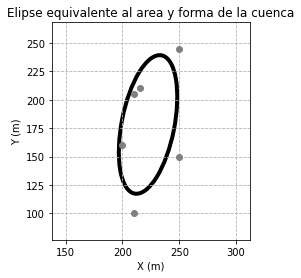

In [ ]:
# Elipse equivalente
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
# ingresar las coordenadas de los vertices de la cuenca
X = [200, 210, 215, 250, 250, 210]  #coordenadas horizontales  m
Y = [160, 205, 210, 245, 150, 100]  #coordenadas verticales m

# procesamiento
Xg = np.mean(X)
Yg = np.mean(Y)
A = 0.5*np.abs(np.dot(X,np.roll(Y,1))-np.dot(Y,np.roll(X,1)))
Imax = (np.var(X)+np.var(Y))/2 + np.sqrt( ((np.var(X)-np.var(Y))/2)**2 + (np.cov(X,Y)[0][1])**2)
Imin = (np.var(X)+np.var(Y))/2 - np.sqrt( ((np.var(X)-np.var(Y))/2)**2 + (np.cov(X,Y)[0][1])**2)
Ri = Imin/Imax
a = np.sqrt((A*np.sqrt(1/Ri))/3.141592)
b = np.sqrt((A*np.sqrt(Ri))/3.141592)
w = (180/np.pi)*(np.arctan(2*np.cov(X,Y)[0][1]/(np.var(Y)-np.var(X))))/2
if Ri < 0.5: print("Indice de forma =",Ri,"es una cuenca alargada con baja susceptibilidad a las avenidas")
else: print("Indice de forma =",Ri,"es una cuenca oval-redonda con susceptibilidad baja-moderada a las avenidas")
print("Area =",A,"m²")
print("Eje mayor =",a,"m")
print("Eje menor =",b,"m")
print("Centro de gravedad =",[Xg,Yg],"m")
figure, axes = plt.subplots()
axes.set_aspect(1)
ax = plt.gca()
if 2*a > (max(Y)-min(Y)):
 ellipse = Ellipse(xy=(Xg, Yg), width=2*a, height=2*b, angle=-w, edgecolor='k', fc='None', lw=4)
else: ellipse = Ellipse(xy=(Xg, Yg), width=2*b, height=2*a, angle=-w, edgecolor='k', fc='None', lw=4)
ax.add_patch(ellipse)
plt.xlim(min(X)-a,max(X)+a)
plt.ylim(min(Y)-b,max(Y)+b)
plt.plot(X,Y,'o', color='gray')
plt.grid(linestyle='--')
plt.title('Elipse equivalente al area y forma de la cuenca')
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.show()

Universidad de Ingenieria y Tecnologia UTEC - Departamento de Ingenieria Ambiental